# LINEAR AND POLYMOMIAL REGRESSION MODELLING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\harsh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data Preparation

In [3]:
df=pd.read_csv('car_price_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price in $        205 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 25.8 K

In [5]:
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price in $
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Analysis

In [6]:
x=df.drop(['car_ID','price in $'],axis=1)
x.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [7]:
y=df['price in $']
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price in $, dtype: float64

In [8]:
x.shape,y.shape

((205, 14), (205,))

<Axes: >

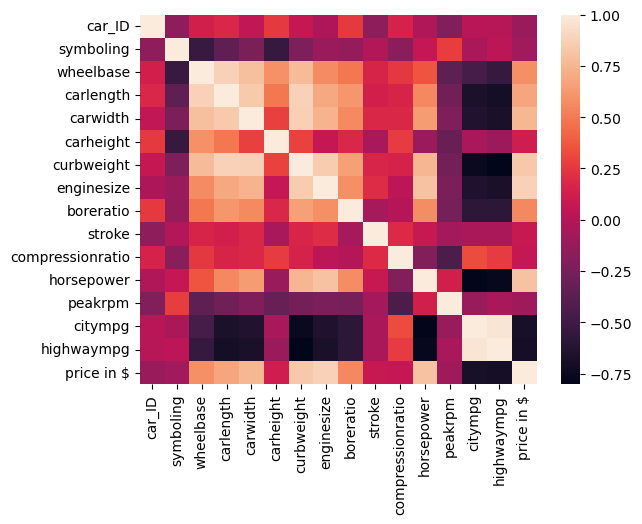

In [9]:
sns.heatmap(df.corr())

In [10]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price in $
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<Axes: xlabel='enginesize', ylabel='price in $'>

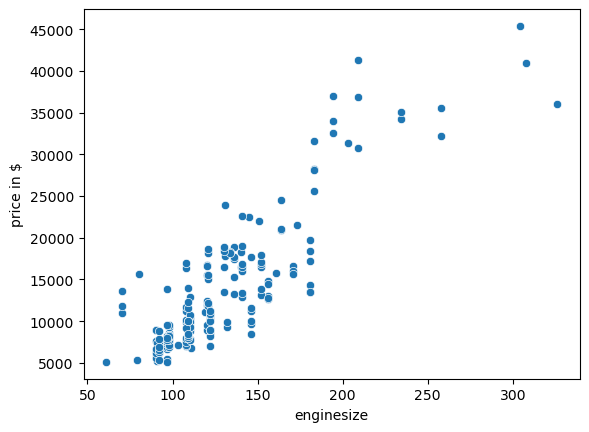

In [11]:
sns.scatterplot(df,x='enginesize',y='price in $')

<Axes: xlabel='horsepower', ylabel='price in $'>

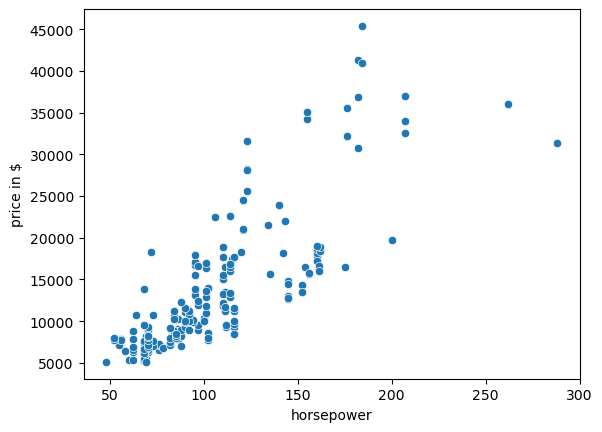

In [12]:
sns.scatterplot(df,x='horsepower',y='price in $')

<Axes: xlabel='curbweight', ylabel='price in $'>

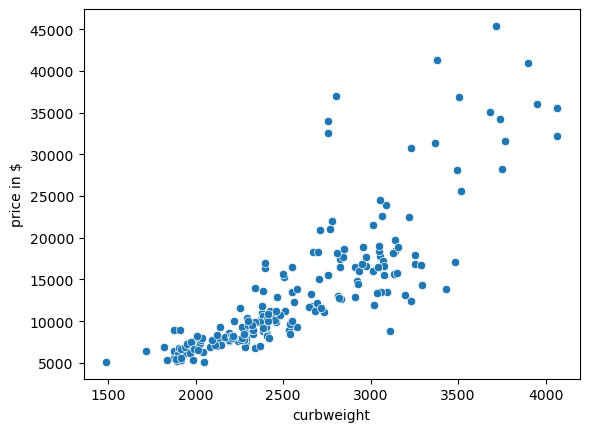

In [13]:
sns.scatterplot(df,x='curbweight',y='price in $')

<Axes: xlabel='stroke', ylabel='price in $'>

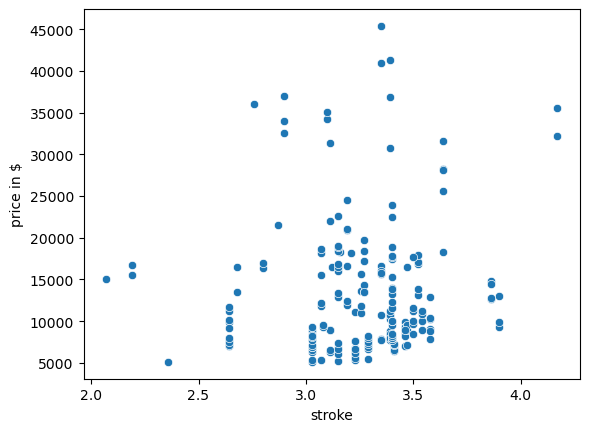

In [14]:
sns.scatterplot(df,x='stroke',y='price in $')

# Training and splitting the data

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)


In [17]:
x_train.shape,y_train.shape

((164, 14), (164,))

In [18]:
y_train.shape,y_train.shape

((164,), (164,))

# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model=LinearRegression()

In [21]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:
x_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
120,1,93.7,157.3,63.8,50.6,1967,90,2.97,3.23,9.4,68,5500,31,38
185,2,97.3,171.7,65.5,55.7,2212,109,3.19,3.40,9.0,85,5250,27,34
180,-1,104.5,187.8,66.5,54.1,3131,171,3.27,3.35,9.2,156,5200,20,24
119,1,93.7,157.3,63.8,50.8,2128,98,3.03,3.39,7.6,102,5500,24,30
109,0,114.2,198.9,68.4,58.7,3230,120,3.46,3.19,8.4,97,5000,19,24


In [23]:
y_test.head()

120     6229.0
185     8195.0
180    15690.0
119     7957.0
109    12440.0
Name: price in $, dtype: float64

In [24]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [27]:
rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))


In [28]:
r2_train=r2_score(y_train,y_train_pred)
r2_test=r2_score(y_test,y_test_pred)

# Polynomial Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly_features=PolynomialFeatures(degree=2,include_bias=False)
x_train_poly=poly_features.fit_transform(x_train)
x_test_poly=poly_features.transform(x_test)

In [31]:
poly_model=LinearRegression()
poly_model.fit(x_train_poly,y_train)

LinearRegression()

In [35]:
y_train_poly_pred=poly_model.predict(x_train_poly)
y_test_poly_pred=poly_model.predict(x_test_poly)

train_rmse_poly=np.sqrt(mean_squared_error(y_train,y_train_poly_pred))
test_rmse_poly=np.sqrt(mean_squared_error(y_test,y_test_poly_pred))

In [36]:
r2_train_poly=r2_score(y_train,y_train_poly_pred)
r2_test_poly=r2_score(y_train,y_train_poly_pred)

# Model Comparision

In [37]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression"],
    "Train RMSE": [rmse_train, train_rmse_poly],
    "Test RMSE": [rmse_test, test_rmse_poly],
    "Train R2": [r2_train, r2_train_poly],
    "Test R2": [r2_test, r2_test_poly]
})

print(comparison)

                   Model   Train RMSE     Test RMSE  Train R2   Test R2
0      Linear Regression  3230.776539   2383.355258  0.848937  0.830459
1  Polynomial Regression   711.628441  15173.799919  0.992671  0.992671
